In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
import warnings
import scipy.stats
warnings.filterwarnings('ignore')
     

In [48]:
data = pd.read_csv("dataset02.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
data.shape

(768, 9)

In [52]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [53]:
data.eq(0).sum()  

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [54]:
def ImputeZeroValuesWithRegression(dataset):

  columnsToBeImputed = ['Glucose','Insulin','SkinThickness','BMI']
  for column in columnsToBeImputed:

    test_df = dataset[dataset[column]==0]


    y_train= dataset[column]
    x_train= dataset.drop(column,axis=1)

    X_test = test_df.drop(column, axis=1)

    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(X_test)


    dataset.loc[dataset[column]==0,column] = y_pred

  return dataset
df=ImputeZeroValuesWithRegression(dataset=data)

In [55]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.000000,140.472103,33.6,0.627,50,1
1,1,85.0,66,29.000000,65.823263,26.6,0.351,31,0
2,8,183.0,64,6.563747,96.262920,23.3,0.672,32,1
3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70,27.000000,103.754985,36.8,0.340,27,0
765,5,121.0,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60,8.428455,12.303375,30.1,0.349,47,1


In [56]:
data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"
    ]]=data[[
    "Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,np.NaN)

In [57]:
data.fillna(data.mean(),inplace=True)

In [58]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,140.472103,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,65.823263,26.6,0.351,31,0
2,8.000000,183.0,64.0,6.563747,96.262920,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


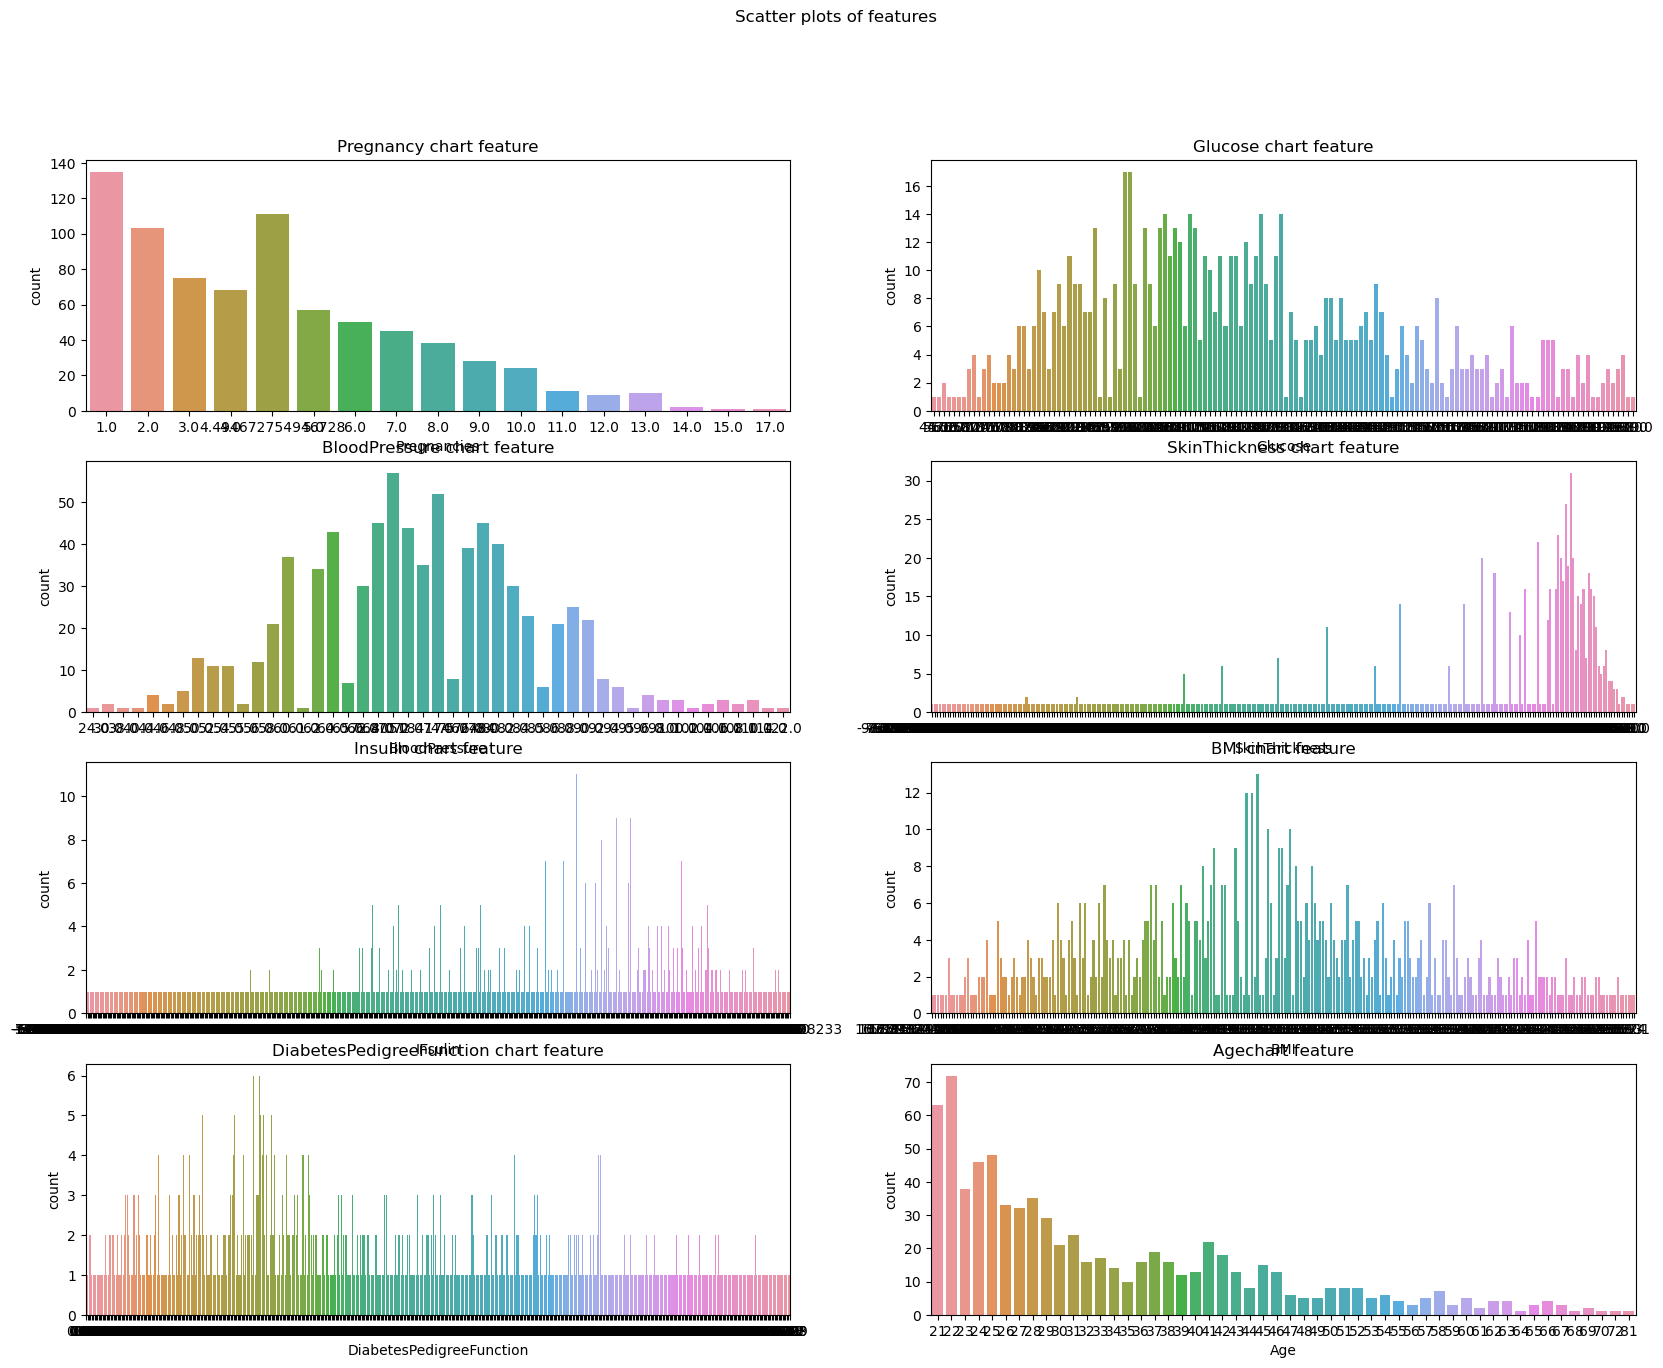

In [59]:
def scatter(ax,axis,name,title):
  sns.countplot(name,data=data,ax=ax[axis[0]][axis[1]])
  ax[axis[0],axis[1]].set_title(title)

f,ax=plt.subplots(4,2,figsize=(20,15))
plt.suptitle("Scatter plots of features")

features = (((0,0),"Pregnancies","Pregnancy chart feature"),((0,1),"Glucose","Glucose chart feature"),((1,0),"BloodPressure","BloodPressure chart feature"),((1,1),"SkinThickness","SkinThickness chart feature")
,((2,0),"Insulin","Insulin chart feature"),((2,1),"BMI","BMI chart feature"),((3,0),"DiabetesPedigreeFunction","DiabetesPedigreeFunction chart feature"),((3,1),"Age","Age" "chart feature"))

for axis, name, title in features:
  scatter(ax,axis,name,title)

[0.25540845 0.15189388 0.14828084 0.10674984 0.10361553 0.11557165
 0.1184798 ]


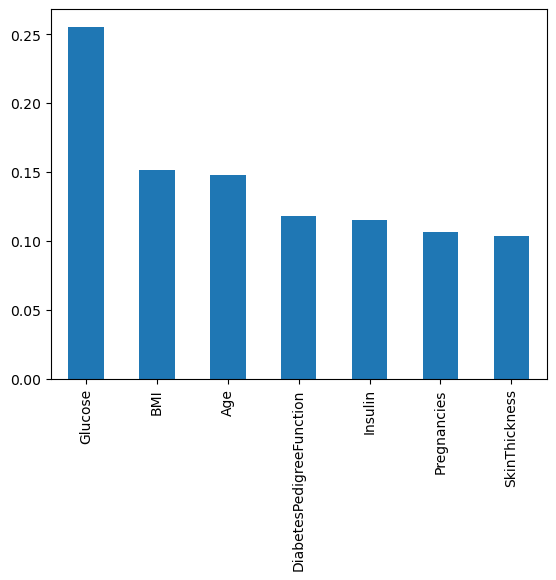

In [60]:
x=data[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction']]
y=data.iloc[:,8]

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

In [61]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.157912,0.259117,-0.021729,-0.069265,0.103917,-0.005658,0.511662,0.248263
Glucose,0.157912,1.000000,0.220755,0.106347,0.493115,0.244369,0.138798,0.269528,0.495549
BloodPressure,0.259117,0.220755,1.000000,0.083431,0.005329,0.270627,-0.002763,0.324595,0.166074
SkinThickness,-0.021729,0.106347,0.083431,1.000000,0.479888,0.567035,0.208902,-0.091770,0.128674
Insulin,-0.069265,0.493115,0.005329,0.479888,1.000000,0.254467,0.220820,-0.019620,0.202597
BMI,0.103917,0.244369,0.270627,0.567035,0.254467,1.000000,0.162973,0.032215,0.313984
DiabetesPedigreeFunction,-0.005658,0.138798,-0.002763,0.208902,0.220820,0.162973,1.000000,0.033561,0.173844
Age,0.511662,0.269528,0.324595,-0.091770,-0.019620,0.032215,0.033561,1.000000,0.238356
Outcome,0.248263,0.495549,0.166074,0.128674,0.202597,0.313984,0.173844,0.238356,1.000000


<AxesSubplot:>

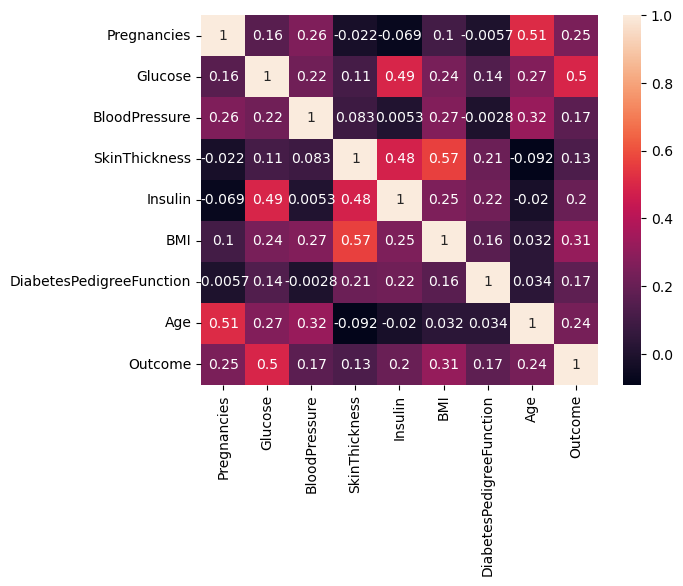

In [62]:
sns.heatmap(data.corr(),annot=True)